# Trans cooccurrence

First, we setup a CombObj with the known TF binding sites.

In [30]:
import tfcomb.objects
C = tfcomb.objects.CombObj()
C.TFBS_from_bed("../data/GM12878_hg19_chr1_TFBS.bed")

INFO: Reading sites from '../data/GM12878_hg19_chr1_TFBS.bed'...
INFO: Read 195341 sites (comprising 112 unique TFs)


## Directional (promoter -> enhancer)

In [31]:
C.count_between("../data/GM12878_interactions_chr1.bedpe", directional=True)

INFO: Read 8715 interactions from .bedpe file
INFO: Assigned .TFBS to 1687 regions
INFO: Counting interactions between 8715 pairs of regions
INFO: Finished .count_between()! Run .market_basket() to estimate significant pairs


In [32]:
C.market_basket()

INFO: Market basket analysis is done! Results are found in .rules


In [33]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine
0,POLR2A,RUNX3,1169.0,3532,3860,195341,0.005984,0.018081,0.019760,0.330974,16.749426,0.316600
1,ELF1,RUNX3,1028.0,3124,3860,195341,0.005263,0.015993,0.019760,0.329065,16.652835,0.296036
2,POLR2AphosphoS5,RUNX3,963.0,2876,3860,195341,0.004930,0.014723,0.019760,0.334840,16.945075,0.289027
3,TAF1,RUNX3,850.0,2252,3860,195341,0.004351,0.011529,0.019760,0.377442,19.101024,0.288298
4,BHLHE40,RUNX3,1047.0,3491,3860,195341,0.005360,0.017871,0.019760,0.299914,15.177594,0.285219
...,...,...,...,...,...,...,...,...,...,...,...,...
11612,NFATC3,SIX5,1.0,1592,1099,195341,0.000005,0.008150,0.005626,0.000628,0.111648,0.000756
11613,SMAD5,SIX5,1.0,1742,1099,195341,0.000005,0.008918,0.005626,0.000574,0.102035,0.000723
11614,NFIC,SIX5,1.0,1818,1099,195341,0.000005,0.009307,0.005626,0.000550,0.097769,0.000707
11615,POLR2AphosphoS2,SIX5,1.0,1904,1099,195341,0.000005,0.009747,0.005626,0.000525,0.093353,0.000691


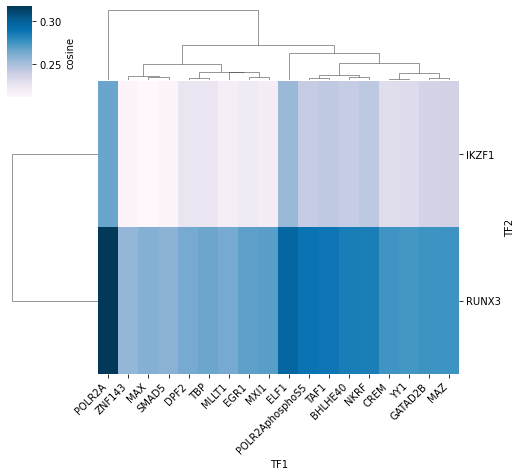

In [34]:
C.plot_heatmap(n_rules=20)

## Undirectional

In [35]:
C.count_between("../data/GM12878_interactions_chr1.bedpe", directional=False)

INFO: Read 8715 interactions from .bedpe file
INFO: Assigned .TFBS to 1687 regions
INFO: Counting interactions between 8715 pairs of regions
INFO: Finished .count_between()! Run .market_basket() to estimate significant pairs


In [36]:
C.market_basket()

INFO: Market basket analysis is done! Results are found in .rules


In [37]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine
0,RUNX3,RUNX3,1894.0,3860,3860,195341,0.009696,0.019760,0.019760,0.490674,24.831261,0.490674
1,RUNX3,IKZF1,1557.0,3860,3087,195341,0.007971,0.019760,0.015803,0.403368,25.524549,0.451052
2,IKZF1,RUNX3,1557.0,3087,3860,195341,0.007971,0.015803,0.019760,0.504373,25.524549,0.451052
3,RUNX3,POLR2A,1625.0,3860,3532,195341,0.008319,0.019760,0.018081,0.420984,23.282991,0.440098
4,POLR2A,RUNX3,1625.0,3532,3860,195341,0.008319,0.018081,0.019760,0.460079,23.282991,0.440098
...,...,...,...,...,...,...,...,...,...,...,...,...
12008,NRF1,NFYA,1.0,840,209,195341,0.000005,0.004300,0.001070,0.001190,1.112674,0.002387
12009,SIX5,CEBPZ,1.0,1099,258,195341,0.000005,0.005626,0.001321,0.000910,0.688931,0.001878
12010,CEBPZ,SIX5,1.0,258,1099,195341,0.000005,0.001321,0.005626,0.003876,0.688931,0.001878
12011,NRF1,SIX5,1.0,840,1099,195341,0.000005,0.004300,0.005626,0.001190,0.211600,0.001041


In [38]:
C.rules.sort_values("TF1_count", ascending=False)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine
0,RUNX3,RUNX3,1894.0,3860,3860,195341,0.009696,0.019760,0.019760,0.490674,24.831261,0.490674
286,RUNX3,SMAD5,787.0,3860,1742,195341,0.004029,0.019760,0.008918,0.203886,22.862972,0.303499
10118,RUNX3,KDM1A,11.0,3860,17,195341,0.000056,0.019760,0.000087,0.002850,32.745367,0.042941
354,RUNX3,MEF2A,673.0,3860,1336,195341,0.003445,0.019760,0.006839,0.174352,25.492634,0.296359
4027,RUNX3,HSF1,186.0,3860,387,195341,0.000952,0.019760,0.001981,0.048187,24.322493,0.152182
...,...,...,...,...,...,...,...,...,...,...,...,...
11514,POLR3G,NKRF,2.0,5,2895,195341,0.000010,0.000026,0.014820,0.400000,26.990121,0.016623
11806,POLR3G,SPI1,1.0,5,1961,195341,0.000005,0.000026,0.010039,0.200000,19.922591,0.010099
11825,POLR3G,MEF2B,1.0,5,2170,195341,0.000005,0.000026,0.011109,0.200000,18.003779,0.009600
11656,POLR3G,CHD1,1.0,5,1082,195341,0.000005,0.000026,0.005539,0.200000,36.107394,0.013596


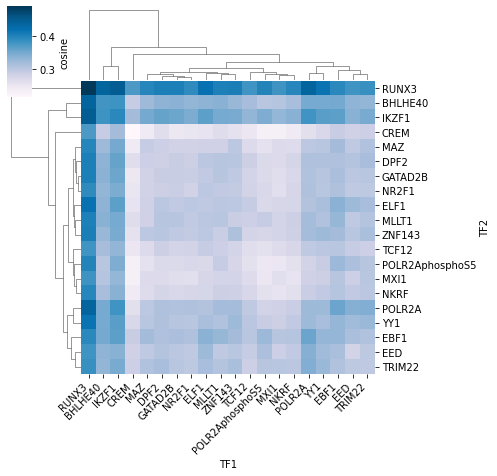

In [39]:
C.plot_heatmap(n_rules=50)

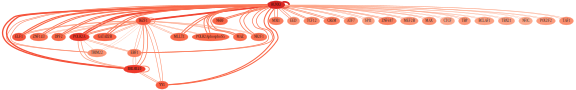

In [40]:
C.plot_network(engine="dot")